# Malaria Image Classification Project

In [ ]:
from google.colab import files
files.upload() # Upload kaggle.json to Colab

# Create a directory for Kaggle configuration
!mkdir -p ~/.kaggle

# Move kaggle.json to the correct directory
!mv kaggle.json ~/.kaggle/

# Set permissions for kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Download the Malaria dataset from Kaggle
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

# Unzip and inspect contents
!unzip cell-images-for-detecting-malaria.zip -d ./malaria_data

import os
os.listdir('./malaria_data')

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria
License(s): unknown
cell-images-for-detecting-malaria.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  cell-images-for-detecting-malaria.zip
replace ./malaria_data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

['cell_images']

## Install Dependencies

In [ ]:
!pip install matplotlib opencv-python tensorflow keras numpy scikit-learn seaborn

## Import and Explore the Data

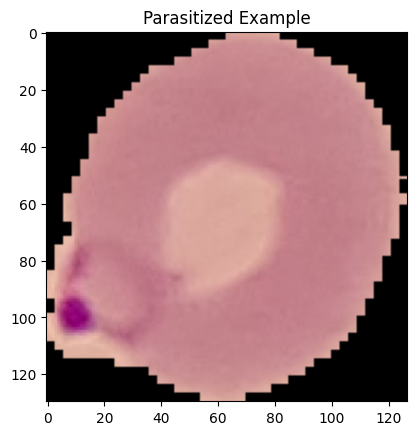

In [ ]:
import matplotlib.pyplot as plt
import os
import cv2

parasitized = os.listdir('./malaria_data/cell_images/Parasitized')
uninfected = os.listdir('./malaria_data/cell_images/Uninfected')

img = cv2.imread('./malaria_data/cell_images/Parasitized/' + parasitized[0])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Parasitized Example")
plt.show()

In [ ]:
# Import ImageDataGenerator class for image processing and augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator object to automatically preprocess images.
# Normalize pixel values and reserve 20% of data for validation.
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create training dataset generator
train = datagen.flow_from_directory('./malaria_data/cell_images',
                                    target_size=(128,128),    # Resize all images to 128x128 pixels
                                    batch_size=32,            # Model processes 32 images at a time
                                    class_mode='binary',      # We use binary because there are only two classes: 'Parasitized' and 'Uninfected'
                                    subset='training')        # Uses 80% of images for training

# Create a validation dataset generator
val = datagen.flow_from_directory('./malaria_data/cell_images',
                                  target_size=(128,128),
                                  batch_size=32,
                                  class_mode='binary',
                                  subset='validation')        # Use the remaining 20% of images for validation

Found 44095 images belonging to 3 classes.
Found 11021 images belonging to 3 classes.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Evaluate model on the validation set
val_loss, val_acc = model.evaluate(val)
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}")
print("\n")

# Get predicted labels (probabilities → binary 0/1)
y_pred_probs = model.predict(val)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

# True labels from the validation generator
y_true = val.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot it
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Uninfected','Parasitized'],
            yticklabels=['Uninfected','Parasitized'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Detailed precision, recall, f1-score
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Uninfected','Parasitized']))

# Accuracy plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

NameError: name 'model' is not defined